In [1]:
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
data = load_breast_cancer()

X,y = data.data,data.target



In [2]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

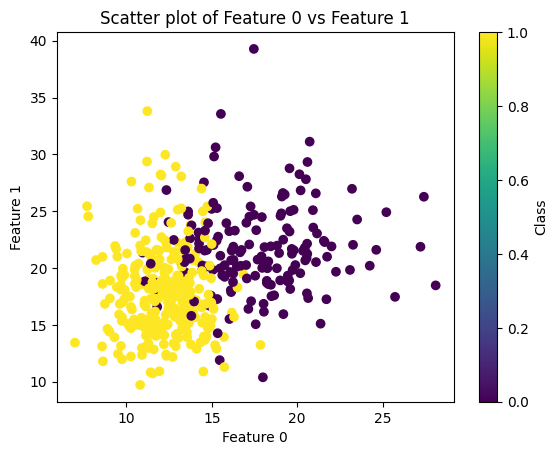

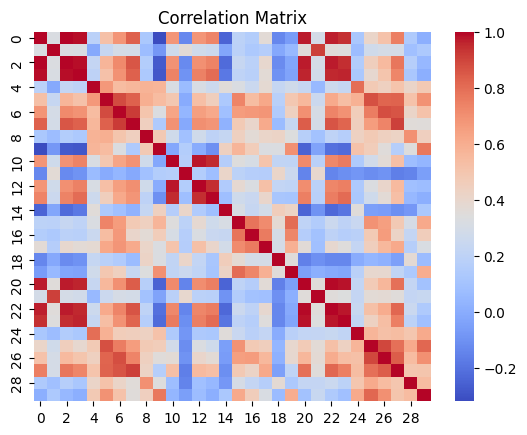

In [3]:

import seaborn as sns
def scatter_plot(feature1, feature2):
    plt.scatter(X_train[:, feature1], X_train[:, feature2], c=y_train, cmap='viridis')
    plt.xlabel(f'Feature {feature1}')
    plt.ylabel(f'Feature {feature2}')
    plt.title(f'Scatter plot of Feature {feature1} vs Feature {feature2}')
    plt.colorbar(label='Class')
    plt.show()

# Visualize two features using scatter plot
scatter_plot(0, 1)  # Example features, you can choose any two features

# Visualize correlation matrix using a heatmap
correlation_matrix = np.corrcoef(X_train, rowvar=False)
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [4]:

tree_list = []

for i in range(100):
    tree = DecisionTreeClassifier(max_features='sqrt')
    subset_indices = np.random.choice(np.arange(len(X_train)), size=len(X_train) // 2, replace=False) 
    X_train_subset = X_train[subset_indices]
    y_train_subset = y_train[subset_indices]
    tree.fit(X_train_subset, y_train_subset)  # Fit the tree with the subset of training data
    tree_list.append(tree)


In [5]:
preds =[]

In [6]:
for i , tree in enumerate(tree_list):
    individual_preds = tree.predict(X_test)
    individual_accuracy = accuracy_score(y_test,individual_preds)
    print(f"tree {i +1 } accuracy: {individual_accuracy}")
    preds.append(individual_preds)




tree 1 accuracy: 0.956140350877193
tree 2 accuracy: 0.956140350877193
tree 3 accuracy: 0.9122807017543859
tree 4 accuracy: 0.9649122807017544
tree 5 accuracy: 0.9122807017543859
tree 6 accuracy: 0.868421052631579
tree 7 accuracy: 0.9473684210526315
tree 8 accuracy: 0.9298245614035088
tree 9 accuracy: 0.8859649122807017
tree 10 accuracy: 0.9122807017543859
tree 11 accuracy: 0.8508771929824561
tree 12 accuracy: 0.8596491228070176
tree 13 accuracy: 0.9385964912280702
tree 14 accuracy: 0.9473684210526315
tree 15 accuracy: 0.9035087719298246
tree 16 accuracy: 0.9210526315789473
tree 17 accuracy: 0.9298245614035088
tree 18 accuracy: 0.9035087719298246
tree 19 accuracy: 0.9473684210526315
tree 20 accuracy: 0.9473684210526315
tree 21 accuracy: 0.9473684210526315
tree 22 accuracy: 0.9385964912280702
tree 23 accuracy: 0.9210526315789473
tree 24 accuracy: 0.9210526315789473
tree 25 accuracy: 0.9210526315789473
tree 26 accuracy: 0.9649122807017544
tree 27 accuracy: 0.8859649122807017
tree 28 accur

In [7]:
from sklearn import ensemble


preds = np.array(preds)
mean_preds = np.round(np.mean(preds,axis = 0 ))

ensemble_accuracy = accuracy_score(y_test,mean_preds)

print(ensemble_accuracy)

0.9736842105263158


In [8]:

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
rf_preds = rf.predict(X_test)
print(accuracy_score(y_test,rf_preds))

0.9824561403508771
